In [ ]:
pip install --upgrade scikit-learn

SyntaxError: invalid syntax (<ipython-input-18-5dba0903d97d>, line 1)

In [ ]:
pip install plotly


Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null

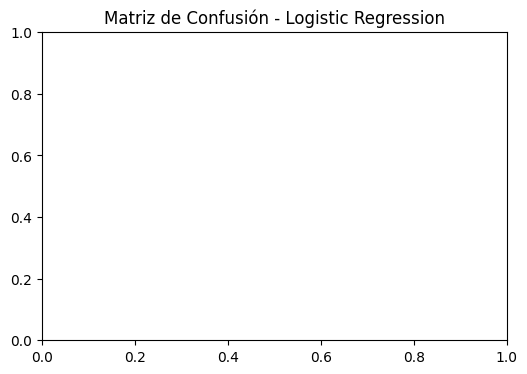


Entrenando y evaluando SVM...

Métricas para SVM:
Accuracy: 0.9598
Precision: 0.6898
Recall: 0.1271
F1 Score: 0.2146

Matriz de Confusión para SVM:
[[111969    290]
 [  4431    645]]


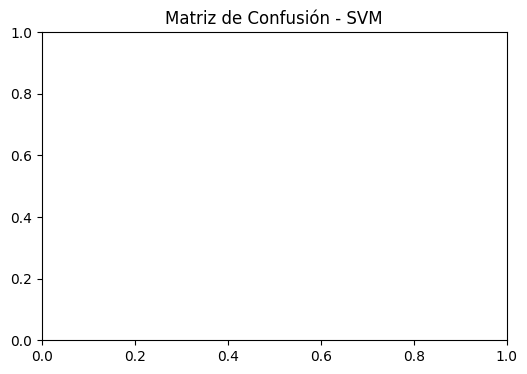


Entrenando y evaluando Random Forest...

Métricas para Random Forest:
Accuracy: 0.9629
Precision: 0.6926
Recall: 0.2565
F1 Score: 0.3744

Matriz de Confusión para Random Forest:
[[111681    578]
 [  3774   1302]]


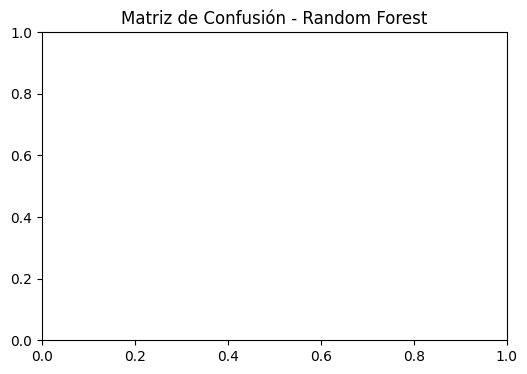


Métricas para todos los modelos:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.957566   0.583765  0.066588  0.119540
1                  SVM  0.959765   0.689840  0.127069  0.214607
2        Random Forest  0.962910   0.692553  0.256501  0.374353


<ipython-input-20-271f3e69ee1d>:113: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




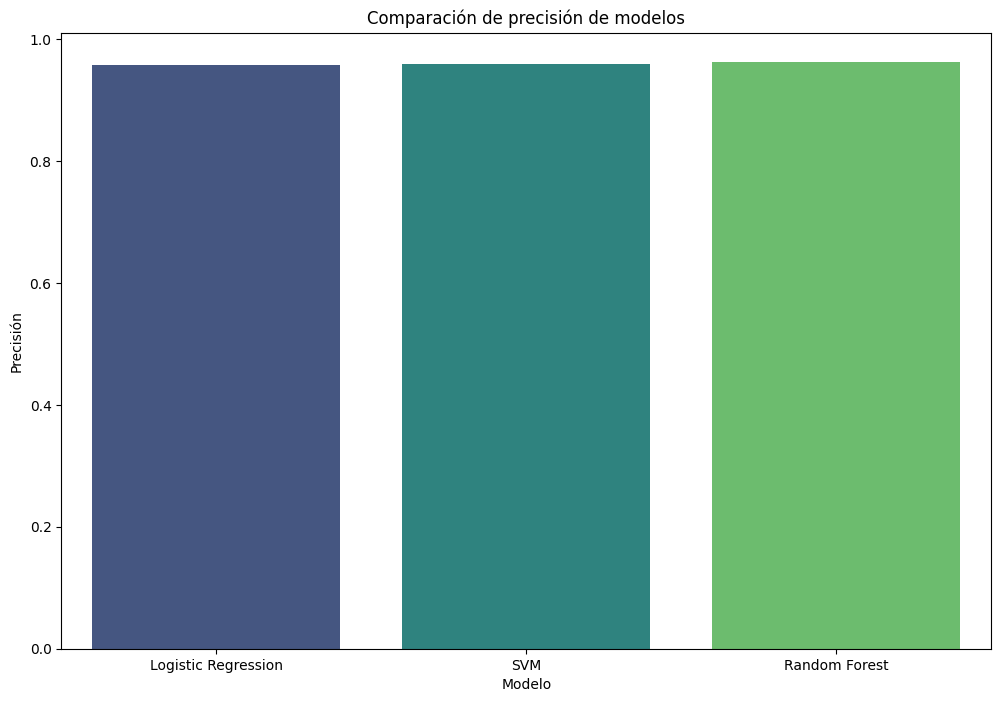

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import plotly.figure_factory as ff

def plot_confusion_matrix(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    z = cm[::-1]
    z_text = [[str(y) for y in x] for x in z]

    fig = ff.create_annotated_heatmap(z, x=class_names, y=class_names[::-1], annotation_text=z_text, colorscale='Blues')
    fig.update_layout(title_text='Matriz de Confusión', xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()

# Leer el conjunto de datos
df = pd.read_csv('tracks.csv')

# Exploración inicial del conjunto de datos
print("Información del conjunto de datos:")
print(df.info())

# Descripción estadística del conjunto de datos
print("\nDescripción estadística:")
print(df.describe())

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df.drop(['explicit'], axis=1)  # Usamos todas las columnas excepto 'explicit' como características
y = df['explicit']  # 'explicit' es la variable objetivo que queremos predecir

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_columns = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# Escalar las características para normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Definir modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Diccionario para almacenar las métricas
metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    print(f"\nEntrenando y evaluando {model_name}...")

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar métricas en el diccionario
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

    # Imprimir métricas del modelo actual
    print(f"\nMétricas para {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Matriz de confusión
    print(f"\nMatriz de Confusión para {model_name}:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(6, 4))
    plot_confusion_matrix(model, X_test_scaled, y_test, class_names=['No Explicit', 'Explicit'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()
# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics_dict)

# Imprimir el DataFrame de métricas
print("\nMétricas para todos los modelos:")
print(metrics_df)

# Visualizar las métricas en un histograma
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Comparación de precisión de modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.show()
